**Models to Try**
- Kernel SVM - https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- LogisticRegression - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- DecisionTreeClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- RandomForestClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- GradientBoostingClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- XGBClassifier - https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html#training-with-scikit-learn-interface
- LGBMClassifier - https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
- GBM

**Cross Validation**
- RandomizedSearchCV - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- GridSearchCV - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- StratifiedKFold - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- 5 - 10 Fold?

**Scaling ?**
- StandardScaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- MinMaxScaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- RobustScaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

**Ways to Address Imbalanced**
- NearMiss - https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html
- SMOTE - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
- SMOTENC - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html
- SMOTEENN - https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html#imblearn.combine.SMOTEENN
- SKLearn Parameter class_weight="auto" or "balanced" - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Metrics**
- F1-Score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- Precision - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- Recall - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- AUC (Area Under Curve) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
- Confusion Matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- ROC Curve (Receiver Operating Characteristic) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [2]:
# Imports
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model Selection / Cross Validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score

# Pipelines
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Imbalanced Dataset
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTEENN

# Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Other Techniques
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline
from scipy.stats import uniform


In [3]:
# Load Base dataframe
df = pd.read_csv('data/Base.csv')

# Separate out the fraud labels
y = df['fraud_bool']

# Keep features minus fraud label
X = df.drop('fraud_bool', axis=1)

In [6]:
df['prev_address_months_count'].value_counts()[-1]

712920

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   income                            1000000 non-null  float64
 1   name_email_similarity             1000000 non-null  float64
 2   prev_address_months_count         1000000 non-null  int64  
 3   current_address_months_count      1000000 non-null  int64  
 4   customer_age                      1000000 non-null  int64  
 5   days_since_request                1000000 non-null  float64
 6   intended_balcon_amount            1000000 non-null  float64
 7   payment_type                      1000000 non-null  object 
 8   zip_count_4w                      1000000 non-null  int64  
 9   velocity_6h                       1000000 non-null  float64
 10  velocity_24h                      1000000 non-null  float64
 11  velocity_4w                       1000

In [4]:
# See unique number of values in features
X.nunique()

income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_credit_limit                   12
foreign_req

In [5]:
# Drop 'device_fraud_count' from X_data as it only has a single unique value in the dataset
X = X.drop(labels='device_fraud_count', axis=1)

In [6]:
# One Hot Vector Encoding for Category Features
cat_columns = X.select_dtypes('object').columns
print(cat_columns)
print(X.shape)

X = pd.get_dummies(X, columns=cat_columns)
print(X.shape)

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')
(1000000, 30)
(1000000, 51)


In [7]:
# Stratified 5 K-Fold Train / Test Split
skf = StratifiedKFold(n_splits=5)

for train_strat, test_strat in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train_strat]), np.bincount(y[test_strat])))


train -  [791176   8824]   |   test -  [197795   2205]
train -  [791177   8823]   |   test -  [197794   2206]
train -  [791177   8823]   |   test -  [197794   2206]
train -  [791177   8823]   |   test -  [197794   2206]
train -  [791177   8823]   |   test -  [197794   2206]


In [8]:
# Define a function to calculate the mean and standard deviation of cross-validated scores
def cv_scores(clf, X, y, scoring):
    print('Scoring: ', clf, scoring)
    scores = cross_val_score(clf, X, y, cv=skf, scoring=scoring)
    return scores.mean(), scores.std()

# Define the models and preprocessing techniques to compare
models = {
    #'Kernel SVM': SVC(kernel='linear', class_weight='balanced'),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decipsion Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Define scaling techniques
preprocessing_techniques = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Define resampling to address imbalance data
resampling_techniques = {
    'No Resampling': None,
    'SMOTE': SMOTE(),
    'NearMiss': NearMiss()
}

# Define metrics to evaluate models
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Define a function to run the comparison
def compare_models(X, y, models, preprocessing_techniques, resampling_techniques, scoring):
    results = []
    for model_name, model in models.items():
        for scaler_name, scaler in preprocessing_techniques.items():
            for resampler_name, resampler in resampling_techniques.items():
                # Define the pipeline
                if resampler:
                    pipeline = ImbPipeline([
                        ('scaler', scaler),
                        ('resampler', resampler),
                        ('clf', model)
                    ])
                else:
                    pipeline = make_pipeline(scaler, model)
                print('Running: ', pipeline)
                # Calculate cross-validated scores
                scores = {}
                for metric_name, metric in scoring.items():
                    mean_score, std_score = cv_scores(pipeline, X, y, metric)
                    scores[metric_name] = mean_score

                result = {
                    'Model': model_name,
                    'Scaler': scaler_name,
                    'Resampler': resampler_name,
                    **scores
                }
                results.append(result)

    return pd.DataFrame(results)



In [9]:
# Run the comparison
#model_scores = compare_models(X, y, models, preprocessing_techniques, resampling_techniques, scoring)

In [10]:
# Save as .pkl and .csv
# model_scores.to_pickle('model_scores.pkl')  # where to save it, usually as a .pkl
# model_scores.to_csv('model_scores.csv')

In [11]:
model_scores = pd.read_pickle('model_scores.pkl')
model_scores

,Model,Scaler,Resampler,precision,recall,f1_score,roc_auc
0,Logistic Regression,StandardScaler,No Resampling,0.045458,0.772132,0.085529,0.792166
1,Logistic Regression,StandardScaler,SMOTE,0.048095,0.750461,0.089876,0.788204
2,Logistic Regression,StandardScaler,NearMiss,0.009823,0.773877,0.019398,0.453230
3,Logistic Regression,MinMaxScaler,No Resampling,0.045492,0.772585,0.085591,0.792414
4,Logistic Regression,MinMaxScaler,SMOTE,0.046841,0.756264,0.087684,0.788026
5,Logistic Regression,MinMaxScaler,NearMiss,0.009751,0.778952,0.019260,0.449271
6,Logistic Regression,RobustScaler,No Resampling,0.045466,0.772676,0.085545,0.792391
7,Logistic Regression,RobustScaler,SMOTE,0.048375,0.749736,0.090473,0.788792
8,Logistic Regression,RobustScaler,NearMiss,0.009971,0.781585,0.019689,0.459528
9,Decision Tree,StandardScaler,No Resampling,0.053938,0.074799,0.058710,0.529802


In [12]:
# preprocessing_techniques = {'No Scaling': None}
# comparison_results_no_scaling = compare_models(X, y, models, preprocessing_techniques, resampling_techniques, scoring)
# comparison_results_no_scaling.to_pickle('model_scores_no_scaling.pkl')

In [13]:
model_scores_no_scaling = pd.read_pickle('model_scores_no_scaling.pkl')
model_scores_no_scaling

,Model,Scaler,Resampler,precision,recall,f1_score,roc_auc
0,Logistic Regression,No Scaling,No Resampling,0.025876,0.708944,0.049895,0.703894
1,Logistic Regression,No Scaling,SMOTE,0.045220,0.645121,0.052743,0.677191
2,Logistic Regression,No Scaling,NearMiss,0.013636,0.814504,0.026709,0.554372
3,Decision Tree,No Scaling,No Resampling,0.055276,0.076794,0.060211,0.529015
4,Decision Tree,No Scaling,SMOTE,0.062337,0.144978,0.079394,0.556867
5,Decision Tree,No Scaling,NearMiss,0.012036,0.925923,0.023826,0.539580
6,Random Forest,No Scaling,No Resampling,0.193203,0.002448,0.005863,0.501583
7,Random Forest,No Scaling,SMOTE,0.211756,0.051770,0.081782,0.524336
8,Random Forest,No Scaling,NearMiss,0.012018,0.983952,0.023779,0.538942
9,XGBoost,No Scaling,No Resampling,0.248547,0.139169,0.097999,0.562748


In [14]:
preprocessing_techniques = {
    'StandardScaler': StandardScaler(),
    #'MinMaxScaler': MinMaxScaler(),
    #'RobustScaler': RobustScaler(),
    'No Scaling': None
}

scoring = {
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score)
}
#model_scores_balanced_accuracy = compare_models(X, y, models, preprocessing_techniques, resampling_techniques, scoring)


In [15]:
# model_scores_balanced_accuracy.to_pickle('model_scores_balanced_accuracy.pkl')
# model_scores_balanced_accuracy

NameError: name 'model_scores_balanced_accuracy' is not defined

In [ ]:
all_metric_scores = pd.concat([model_scores, model_scores_no_scaling])
all_metric_scores

,Model,Scaler,Resampler,precision,recall,f1_score,roc_auc
0,Logistic Regression,StandardScaler,No Resampling,0.045458,0.772132,0.085529,0.792166
1,Logistic Regression,StandardScaler,SMOTE,0.048095,0.750461,0.089876,0.788204
2,Logistic Regression,StandardScaler,NearMiss,0.009823,0.773877,0.019398,0.453230
3,Logistic Regression,MinMaxScaler,No Resampling,0.045492,0.772585,0.085591,0.792414
4,Logistic Regression,MinMaxScaler,SMOTE,0.046841,0.756264,0.087684,0.788026
5,Logistic Regression,MinMaxScaler,NearMiss,0.009751,0.778952,0.019260,0.449271
6,Logistic Regression,RobustScaler,No Resampling,0.045466,0.772676,0.085545,0.792391
7,Logistic Regression,RobustScaler,SMOTE,0.048375,0.749736,0.090473,0.788792
8,Logistic Regression,RobustScaler,NearMiss,0.009971,0.781585,0.019689,0.459528
9,Decision Tree,StandardScaler,No Resampling,0.053938,0.074799,0.058710,0.529802


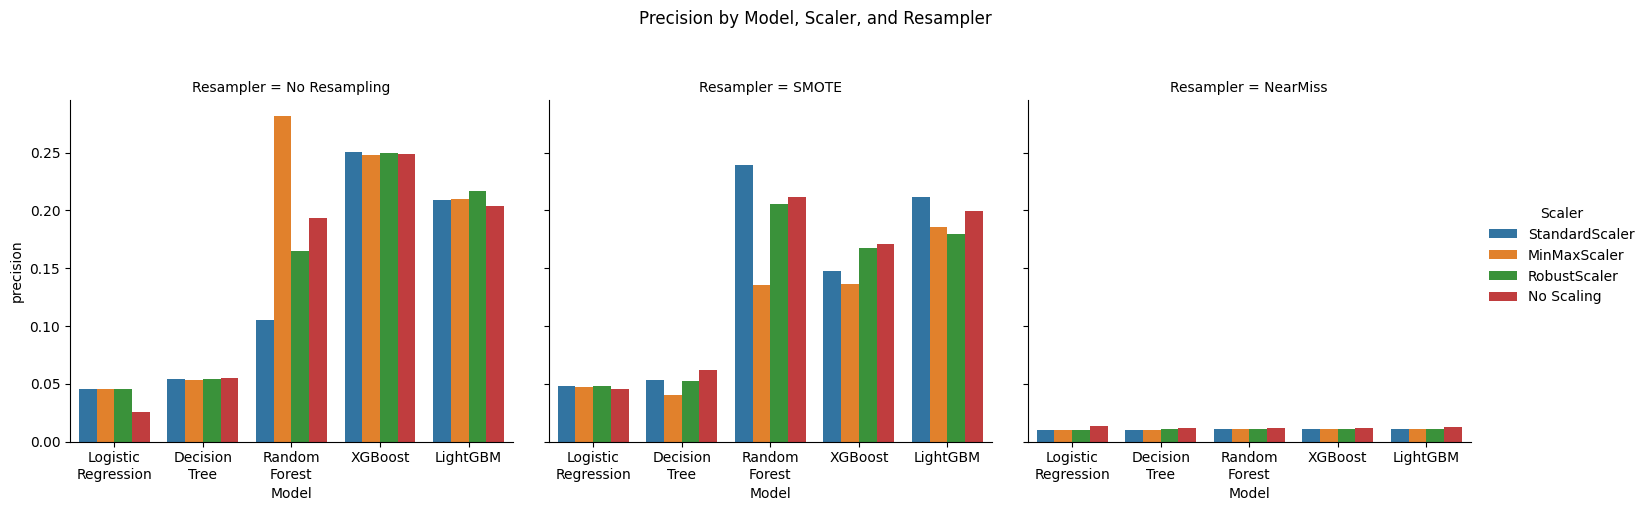

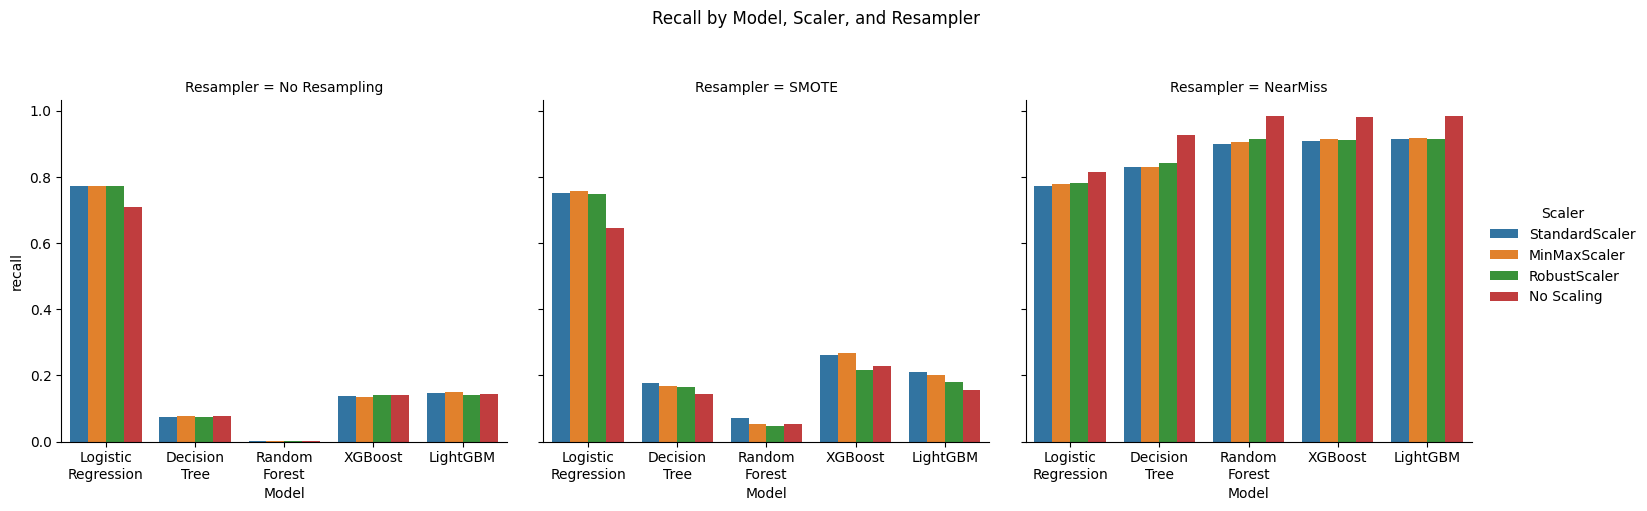

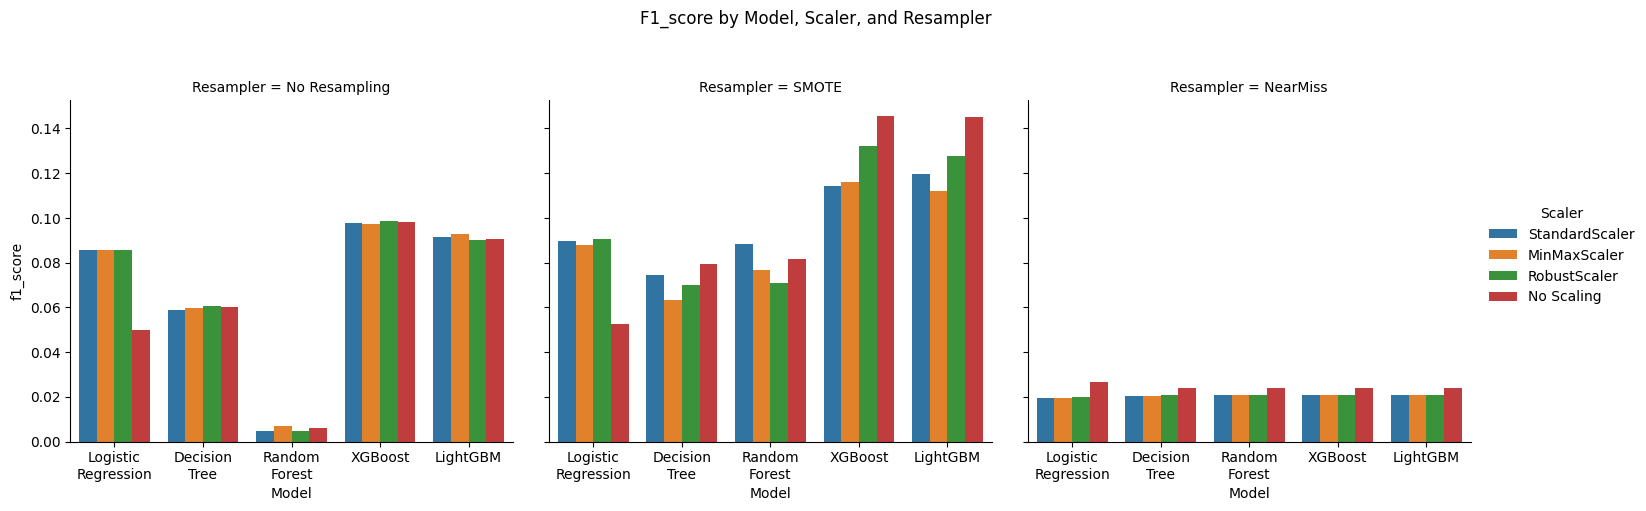

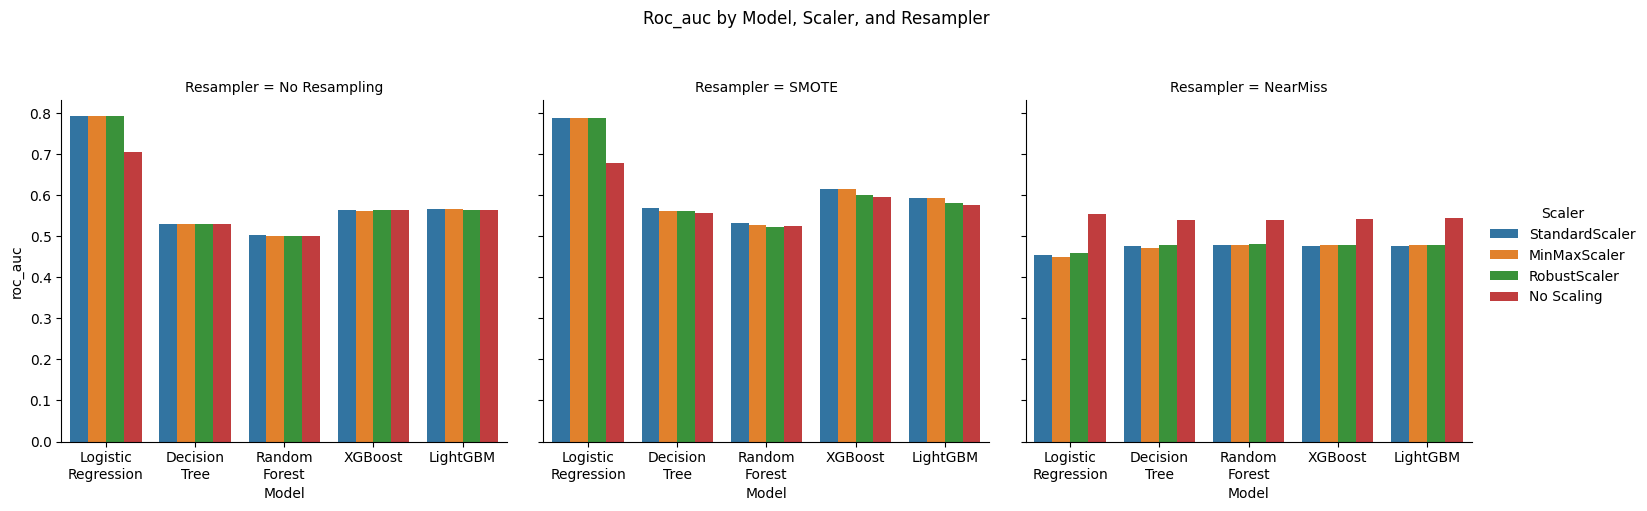

In [ ]:
import textwrap

metrics = ['precision', 'recall', 'f1_score', 'roc_auc']

for metric in metrics:
    g = sns.catplot(data=all_metric_scores, x='Model', y=metric, hue='Scaler', col='Resampler', kind='bar', errorbar=None)
    g.figure.subplots_adjust(top=0.8)
    g.figure.suptitle(f'{metric.capitalize()} by Model, Scaler, and Resampler')
    # iterate over axes of FacetGrid
    for ax in g.axes.flat:
        labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
        g.set_xticklabels(labels)
plt.show()

In [21]:
models = {
    #'Kernel SVM': SVC(kernel='linear', class_weight='balanced'),
    #'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    #'Decipsion Tree': DecisionTreeClassifier(),
    #'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(),
    #'LightGBM': LGBMClassifier()
}

# Define scaling techniques
preprocessing_techniques = {
    'No Scaling': None,
    #'StandardScaler': StandardScaler(),
    #'MinMaxScaler': MinMaxScaler(),
    #'RobustScaler': RobustScaler()
}

# Define resampling to address imbalance data
resampling_techniques = {
    'No Resampling': None,
    #'SMOTE': SMOTE(),
    'NearMiss': NearMiss(sampling_strategy=0.1, n_jobs=-1)
}

# Define metrics to evaluate models
scoring = {
#'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score)
}

In [17]:
narrowed_model_scores = compare_models(X, y, models, preprocessing_techniques, resampling_techniques, scoring)

Running:  Pipeline(steps=[('nonetype', None),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy

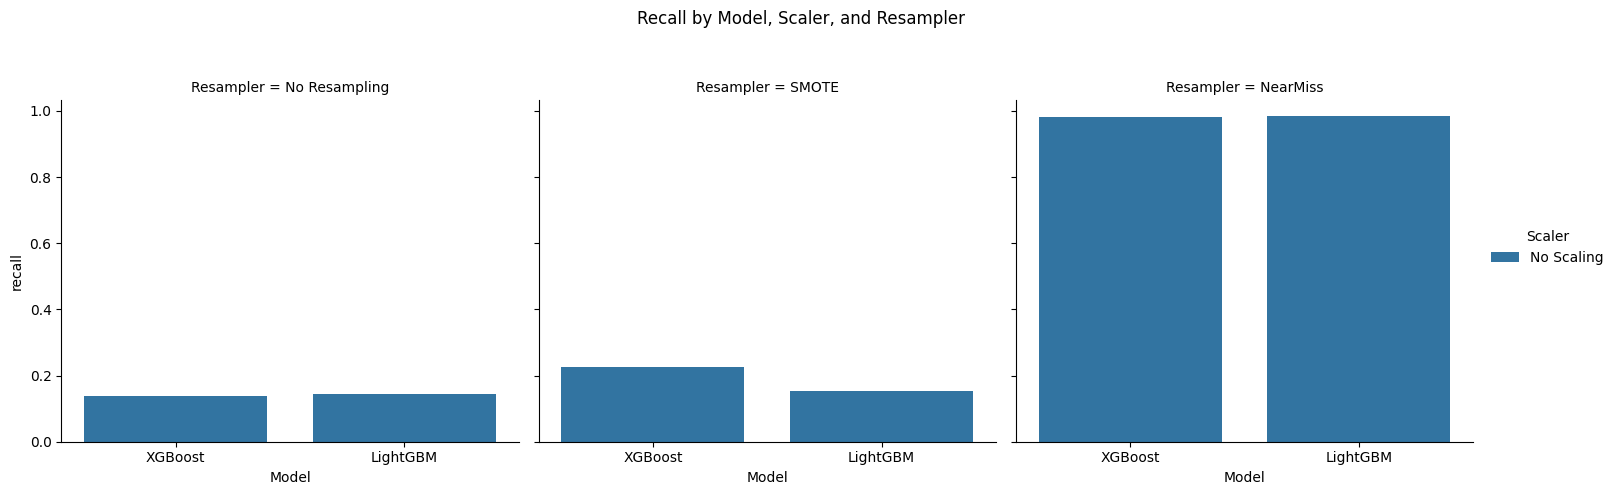

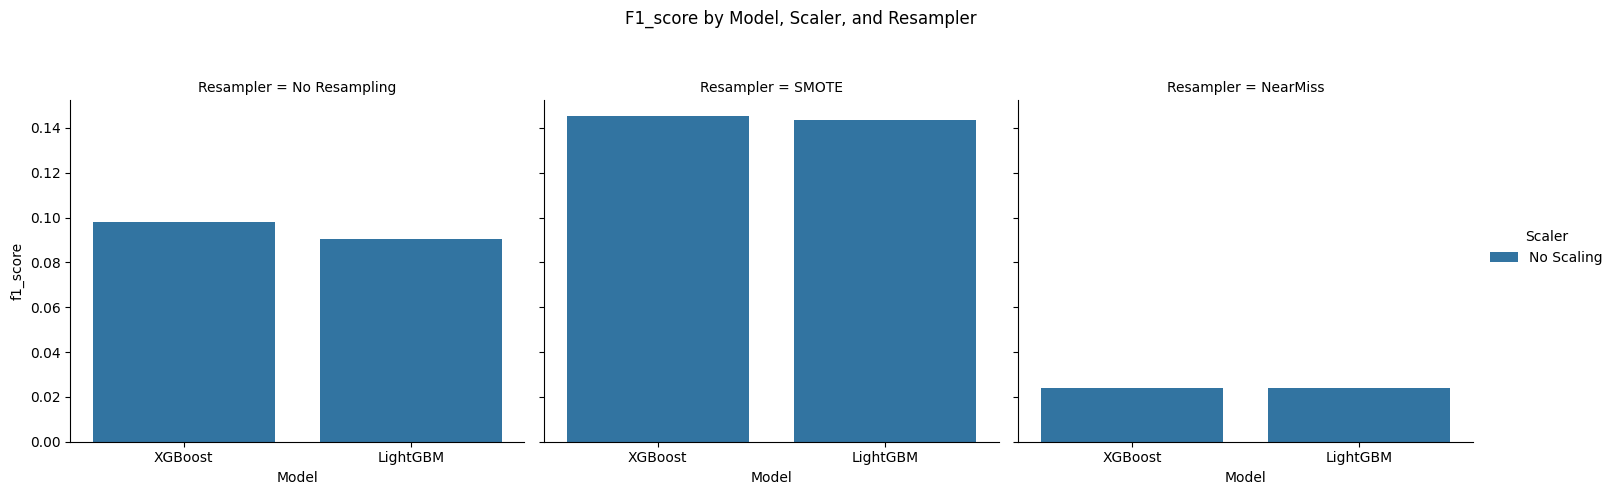

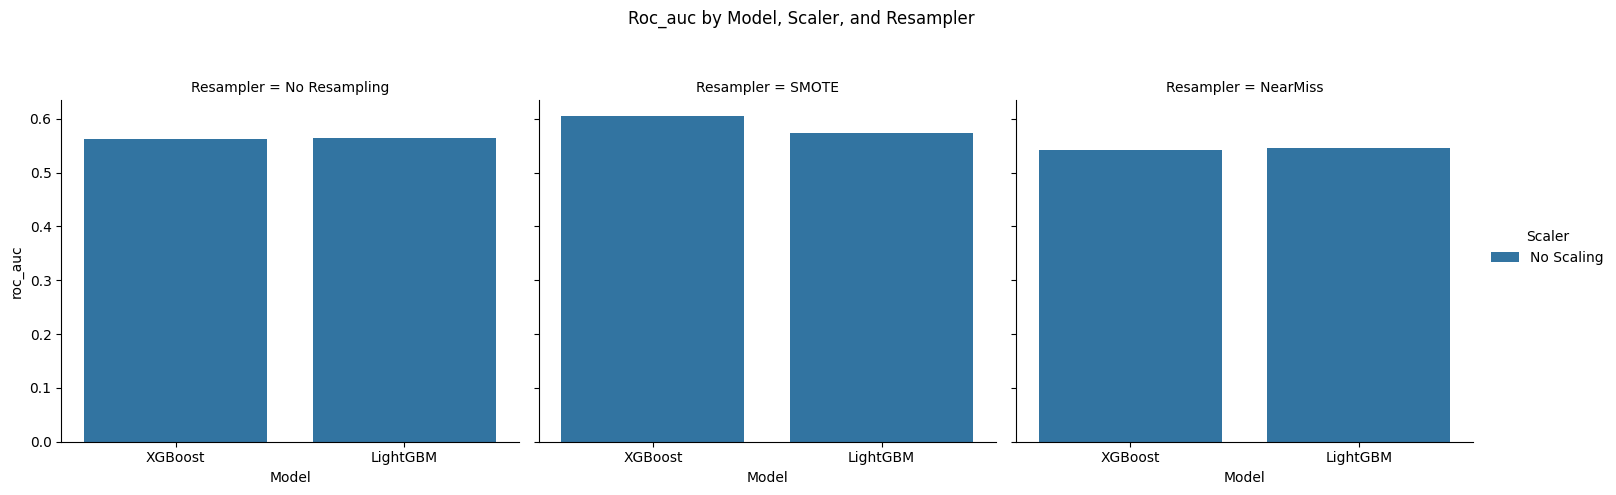

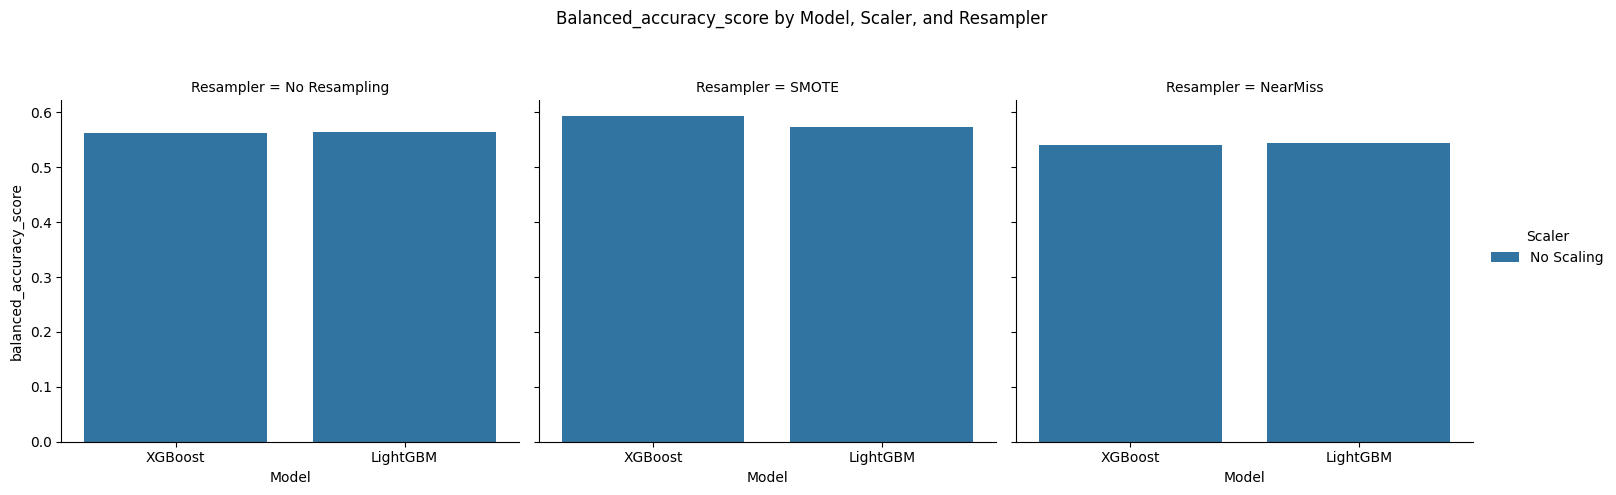

In [19]:
metrics = ['recall', 'f1_score', 'roc_auc', 'balanced_accuracy_score']

for metric in metrics:
    g = sns.catplot(data=narrowed_model_scores, x='Model', y=metric, hue='Scaler', col='Resampler', kind='bar', errorbar=None)
    g.figure.subplots_adjust(top=0.8)
    g.figure.suptitle(f'{metric.capitalize()} by Model, Scaler, and Resampler')
    # # iterate over axes of FacetGrid
    # for ax in g.axes.flat:
    #     labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
    #     g.set_xticklabels(labels)
plt.show()

In [22]:
xgboost_results = compare_models(X, y, models, preprocessing_techniques, resampling_techniques, scoring)

Running:  Pipeline(steps=[('nonetype', None),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy

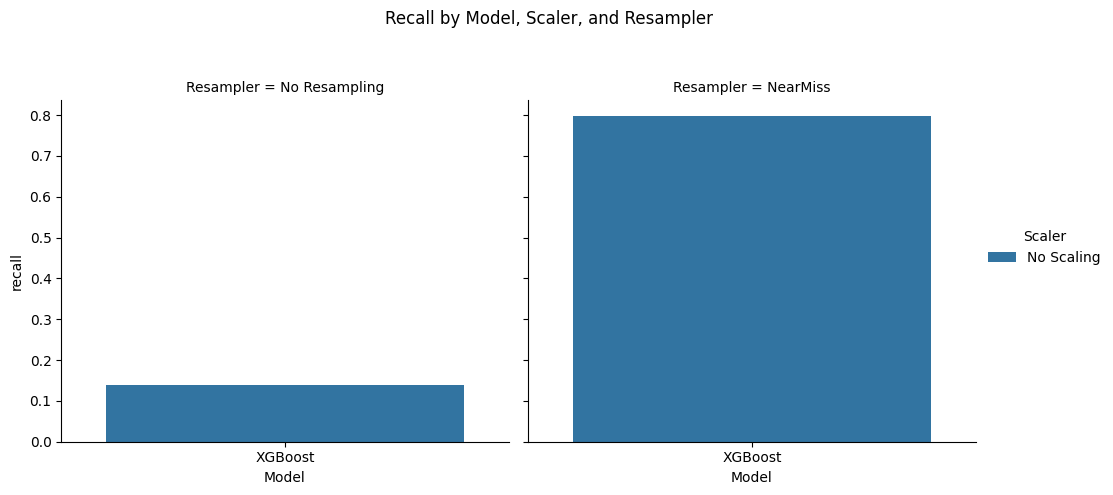

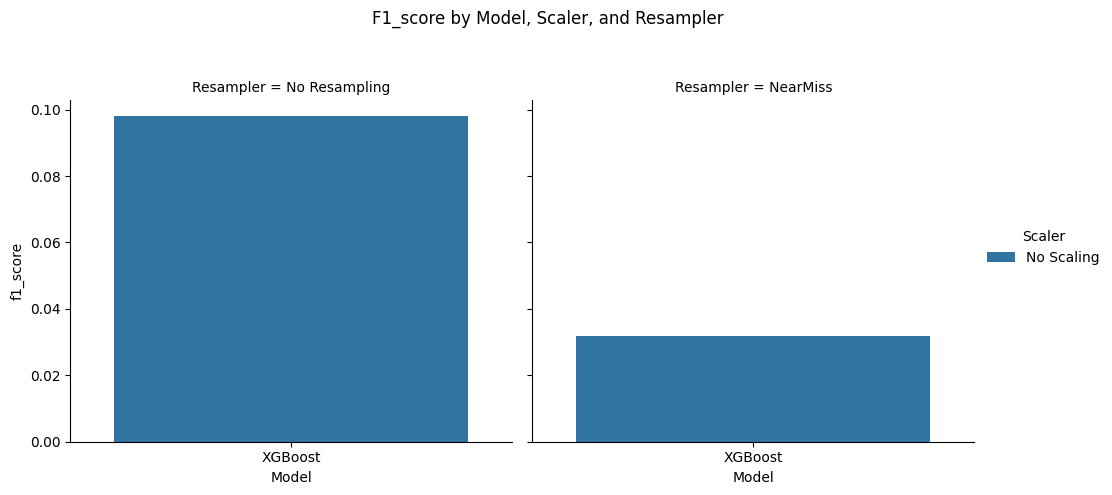

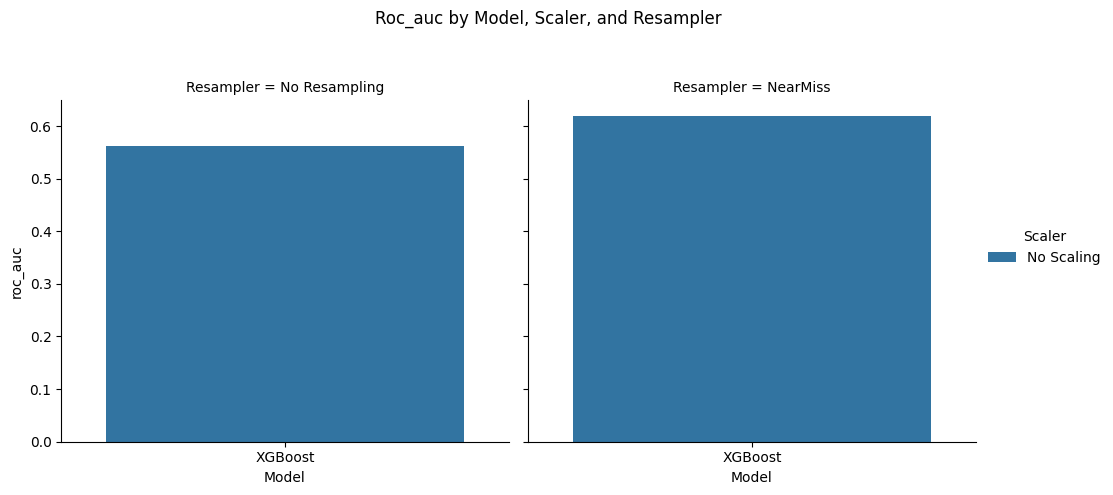

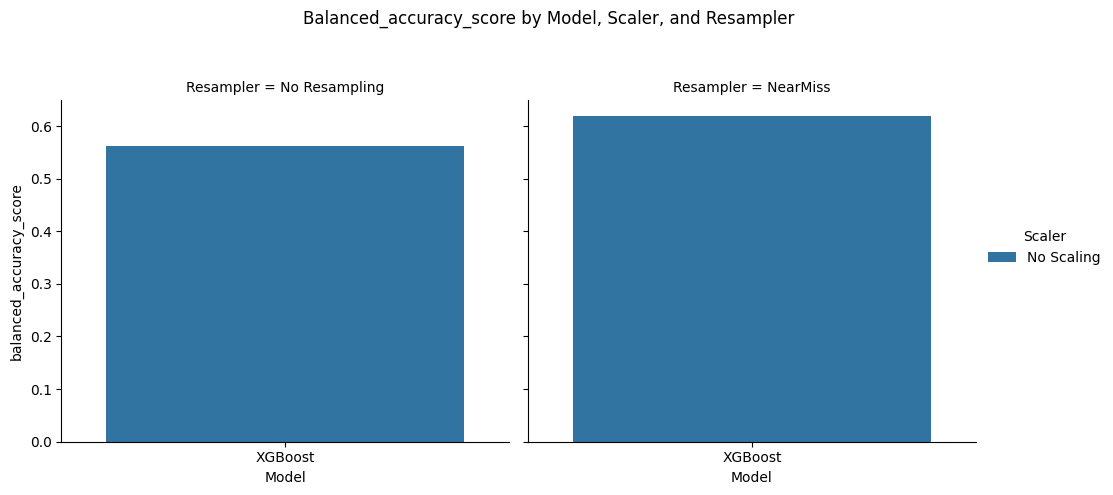

In [23]:
metrics = ['recall', 'f1_score', 'roc_auc', 'balanced_accuracy_score']

for metric in metrics:
    g = sns.catplot(data=xgboost_results, x='Model', y=metric, hue='Scaler', col='Resampler', kind='bar', errorbar=None)
    g.figure.subplots_adjust(top=0.8)
    g.figure.suptitle(f'{metric.capitalize()} by Model, Scaler, and Resampler')
    # # iterate over axes of FacetGrid
    # for ax in g.axes.flat:
    #     labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
    #     g.set_xticklabels(labels)
plt.show()